In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head().style.background_gradient(cmap='Blues')

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
col_names = df.columns

col_names

Index(['x1', 'x2', 'y'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [8]:
df['y'].isnull().sum()

0

In [9]:
df['y'].nunique()

2

In [10]:
df['y'].unique()

array([1, 0], dtype=int64)

In [11]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [12]:
df['y'].value_counts()/len(df)

0    0.557701
1    0.442299
Name: y, dtype: float64

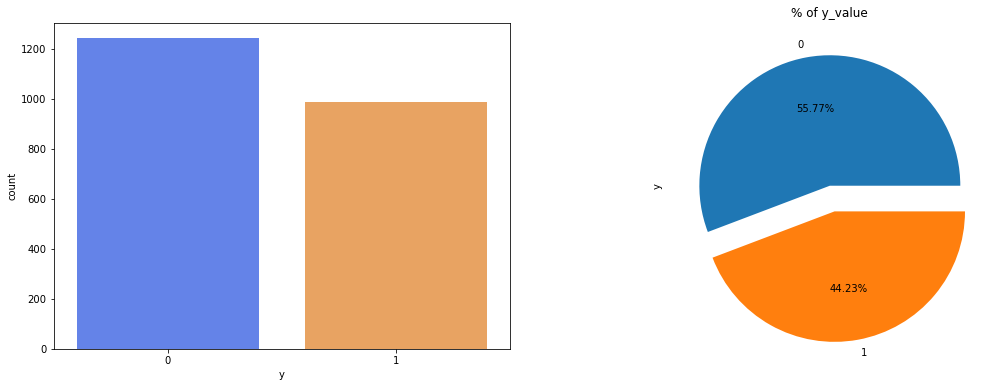

In [13]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(df['y'],ax=ax[0],palette = 'bright',alpha=0.7)

loan_status_count = df['y'].value_counts(normalize=True)
loan_status_count.plot.pie(autopct="%.2f%%",explode = [0,0.2],ax=ax[1])
plt.title('% of y_value')
plt.show()

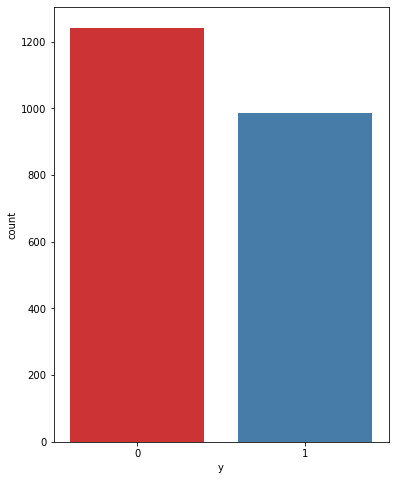

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="y", data=df, palette="Set1")
plt.show()

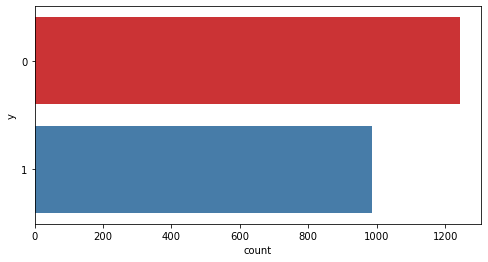

In [15]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="y", data=df, palette="Set1")
plt.show()

In [16]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [17]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['x1', 'x2', 'y']


In [18]:
# check missing values in numerical variables

df[numerical].isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# Outliers in numerical variables

In [19]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

           x1          x2       y
count  2222.0      2224.0  2227.0
mean     -5.0     89476.0     0.0
std      75.0   2983323.0     0.0
min    -134.0      -135.0     0.0
25%     -72.0       -80.0     0.0
50%     -10.0        -1.0     0.0
75%      60.0        64.0     1.0
max     135.0  99999999.0     1.0 2


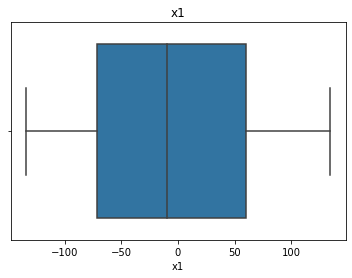

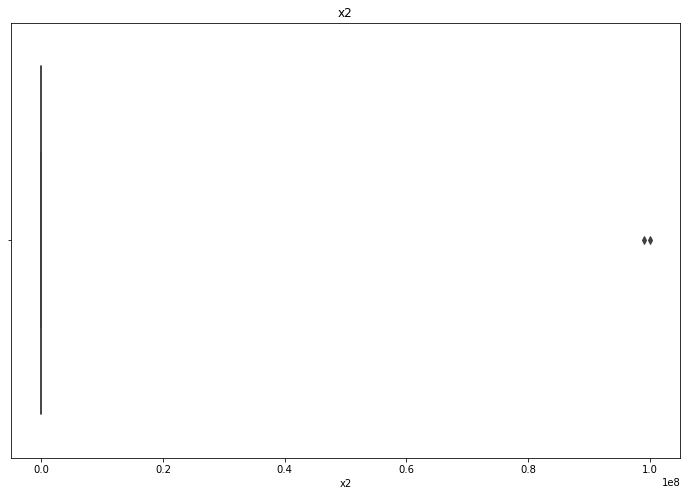

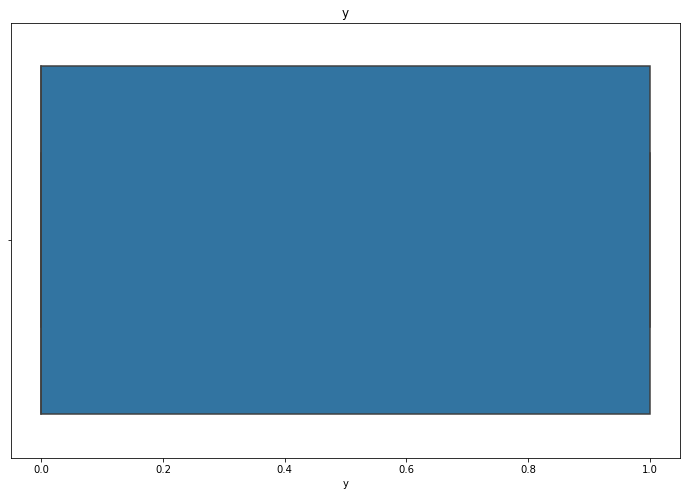

<Figure size 864x576 with 0 Axes>

In [20]:
for feature in numerical:
    df=df.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(12,8))

Text(0, 0.5, 'y')

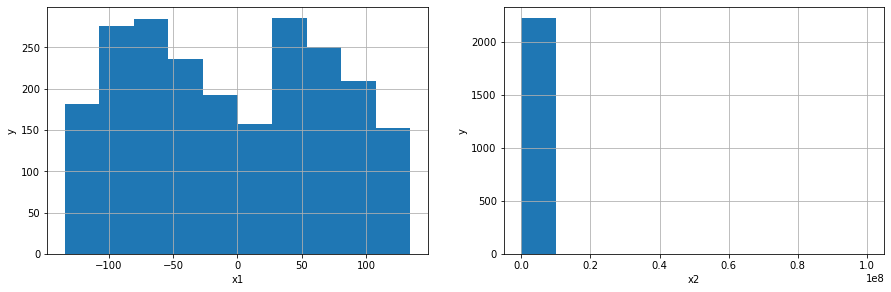

In [21]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.x1.hist(bins=10)
fig.set_xlabel('x1')
fig.set_ylabel('y')


plt.subplot(2, 2, 2)
fig = df.x2.hist(bins=10)
fig.set_xlabel('x2')
fig.set_ylabel('y')

In [22]:
# find outliers for  variable

IQR = df.x1.quantile(0.75) - df.x1.quantile(0.25)
Lower_fence = df.x1.quantile(0.25) - (IQR * 3)
Upper_fence = df.x1.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -466.4700072950001 or > 454.5269392425001


In [23]:
# find outlier variable

IQR = df.x2.quantile(0.75) - df.x2.quantile(0.25)
Lower_fence = df.x2.quantile(0.25) - (IQR * 3)
Upper_fence = df.x2.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -512.1919057275 or > 495.9529403899999


In [24]:
correlation = df.corr()

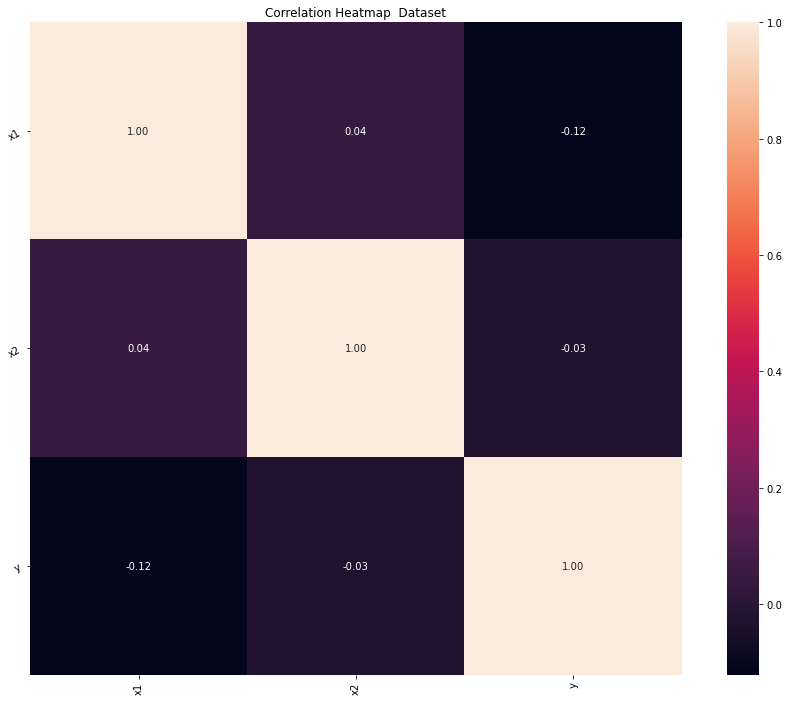

In [25]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap  Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [26]:
num_var = ['x1','x2'] 

In [27]:
#sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
#plt.show()

In [28]:
X = df.drop(['y'], axis=1)

y = df['y']

In [29]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1781, 2), (446, 2))

In [31]:
X_train.shape

(1781, 2)

In [32]:
 y_test.shape

(446,)

In [33]:
# check data types in X_train

X_train.dtypes

x1    float64
x2    float64
dtype: object

In [34]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['x1', 'x2']

In [35]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

x1    3
x2    3
dtype: int64

In [36]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

x1    2
x2    0
dtype: int64

In [37]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

x1 0.0017
x2 0.0017


In [38]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)   

In [39]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

x1    0
x2    0
dtype: int64

In [40]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

x1    0
x2    0
dtype: int64

In [41]:
# check missing values in X_train

X_train.isnull().sum()

x1    0
x2    0
dtype: int64

In [42]:
# check missing values in X_test

X_test.isnull().sum()

x1    0
x2    0
dtype: int64

In [43]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['x1'] = max_value(df3, 'x1', 454.52)
    df3['x2'] = max_value(df3, 'x2',495.95)

In [44]:
X_train.x1.max(), X_test.x1.max()

(134.5086874, 134.1779604)

In [45]:
X_train.x2.max(), X_test.x2.max()

(495.95, 134.9297479)

In [46]:
X_train[numerical].describe()

,x1,x2
count,1781.000000,1781.000000
mean,-4.051562,-6.041393
std,74.286338,80.592979
min,-134.369160,-134.876132
25%,-70.258156,-78.587280
50%,-8.940951,-0.440219
75%,59.633331,62.513342
max,134.508687,495.950000


In [47]:
X_test[numerical].describe()

,x1,x2
count,446.000000,446.000000
mean,-7.928636,-6.831421
std,77.095855,83.526091
min,-133.793105,-134.631502
25%,-80.281725,-86.134034
50%,-10.658437,-2.816089
75%,59.355671,69.679548
max,134.177960,134.929748


In [48]:
cols = X_train.columns

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [50]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [51]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [52]:
X_train.describe()

,x1,x2
count,1781.000000,1781.000000
mean,0.484672,0.204232
std,0.276283,0.127758
min,0.000000,0.000000
25%,0.238439,0.089230
50%,0.466488,0.213111
75%,0.721526,0.312906
max,1.000000,1.000000


In [53]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [54]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [55]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.56034442, 0.6185759 , 0.57999094, 0.49853123, 0.54626412,
       0.42889225, 0.6123772 , 0.53565208, 0.5898913 , 0.54114331,
       0.53257193, 0.61852258, 0.70130872, 0.62207061, 0.65796407,
       0.51006888, 0.51423068, 0.44628206, 0.5589614 , 0.5004654 ,
       0.57772227, 0.50279855, 0.51946916, 0.59988036, 0.56192163,
       0.55027092, 0.59731684, 0.59190695, 0.55383051, 0.62475585,
       0.63441985, 0.64108991, 0.40450912, 0.44458507, 0.67885461,
       0.51449577, 0.46819149, 0.62049429, 0.50883562, 0.48081074,
       0.64226302, 0.52362639, 0.52161998, 0.44410978, 0.46508598,
       0.51875607, 0.52553657, 0.51015573, 0.58812779, 0.59819574,
       0.55992972, 0.46015197, 0.58674303, 0.46049639, 0.65037097,
       0.48147975, 0.57730669, 0.66063083, 0.65555258, 0.58676327,
       0.55219147, 0.64150539, 0.53042996, 0.64674972, 0.50444016,
       0.5433657 , 0.52504182, 0.58439572, 0.52485441, 0.43013492,
       0.68644097, 0.50461307, 0.54045257, 0.53423305, 0.59495

In [56]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.43965558, 0.3814241 , 0.42000906, 0.50146877, 0.45373588,
       0.57110775, 0.3876228 , 0.46434792, 0.4101087 , 0.45885669,
       0.46742807, 0.38147742, 0.29869128, 0.37792939, 0.34203593,
       0.48993112, 0.48576932, 0.55371794, 0.4410386 , 0.4995346 ,
       0.42227773, 0.49720145, 0.48053084, 0.40011964, 0.43807837,
       0.44972908, 0.40268316, 0.40809305, 0.44616949, 0.37524415,
       0.36558015, 0.35891009, 0.59549088, 0.55541493, 0.32114539,
       0.48550423, 0.53180851, 0.37950571, 0.49116438, 0.51918926,
       0.35773698, 0.47637361, 0.47838002, 0.55589022, 0.53491402,
       0.48124393, 0.47446343, 0.48984427, 0.41187221, 0.40180426,
       0.44007028, 0.53984803, 0.41325697, 0.53950361, 0.34962903,
       0.51852025, 0.42269331, 0.33936917, 0.34444742, 0.41323673,
       0.44780853, 0.35849461, 0.46957004, 0.35325028, 0.49555984,
       0.4566343 , 0.47495818, 0.41560428, 0.47514559, 0.56986508,
       0.31355903, 0.49538693, 0.45954743, 0.46576695, 0.40504

# Check accuracy score

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7152


In [58]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7136


In [60]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7136
Test set score: 0.7152


In [61]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7221
Test set score: 0.7242


In [63]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[237   5]
 [122  82]]

True Positives(TP) =  237

True Negatives(TN) =  82

False Positives(FP) =  5

False Negatives(FN) =  122


<AxesSubplot:>

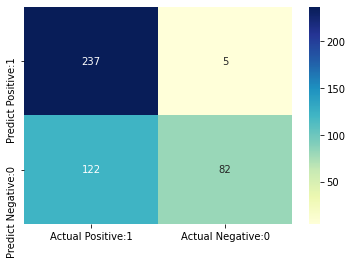

In [64]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       242
           1       0.94      0.40      0.56       204

    accuracy                           0.72       446
   macro avg       0.80      0.69      0.68       446
weighted avg       0.79      0.72      0.69       446



# Classification Accuracy

In [66]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [67]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7152


# Classification Error

In [68]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2848


In [69]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9793


In [70]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6602


In [71]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6602


In [72]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0575


In [73]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9425


In [74]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.56034442, 0.43965558],
       [0.6185759 , 0.3814241 ],
       [0.57999094, 0.42000906],
       [0.49853123, 0.50146877],
       [0.54626412, 0.45373588],
       [0.42889225, 0.57110775],
       [0.6123772 , 0.3876228 ],
       [0.53565208, 0.46434792],
       [0.5898913 , 0.4101087 ],
       [0.54114331, 0.45885669]])

In [75]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.560344,0.439656
1,0.618576,0.381424
2,0.579991,0.420009
3,0.498531,0.501469
4,0.546264,0.453736
5,0.428892,0.571108
6,0.612377,0.387623
7,0.535652,0.464348
8,0.589891,0.410109
9,0.541143,0.458857


In [76]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.43965558, 0.3814241 , 0.42000906, 0.50146877, 0.45373588,
       0.57110775, 0.3876228 , 0.46434792, 0.4101087 , 0.45885669])

In [77]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

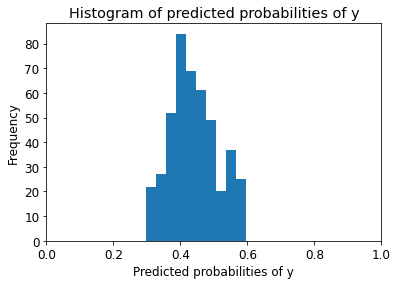

In [78]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of y')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of y')
plt.ylabel('Frequency')

In [79]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.5757


In [80]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [81]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7164


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=0, solver='liblinear')


In [82]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7220


# KNN

In [83]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[233   9]
 [ 13 191]]
0.9506726457399103
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       242
           1       0.95      0.94      0.95       204

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

0.9495422135796467

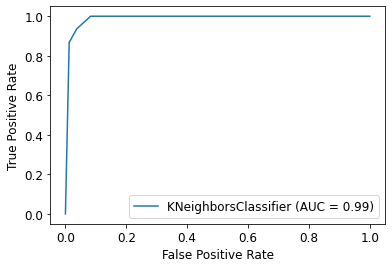

In [87]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

# SVM

In [88]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [89]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[241   1]
 [ 26 178]]
0.9394618834080718
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       242
           1       0.99      0.87      0.93       204

    accuracy                           0.94       446
   macro avg       0.95      0.93      0.94       446
weighted avg       0.94      0.94      0.94       446



0.9342083941014422

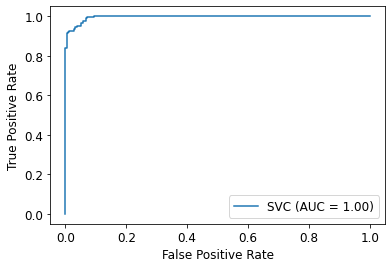

In [90]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [91]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [92]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[238   4]
 [116  88]]
0.7309417040358744
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       242
           1       0.96      0.43      0.59       204

    accuracy                           0.73       446
   macro avg       0.81      0.71      0.70       446
weighted avg       0.80      0.73      0.71       446



In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [94]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[230  12]
 [ 11 193]]
0.9484304932735426
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       242
           1       0.94      0.95      0.94       204

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



0.9482458272565224

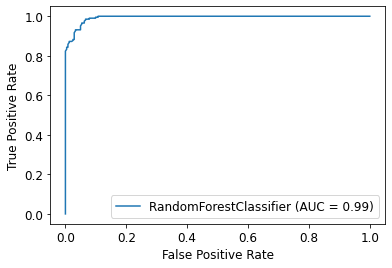

In [95]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

0.9482458272565224

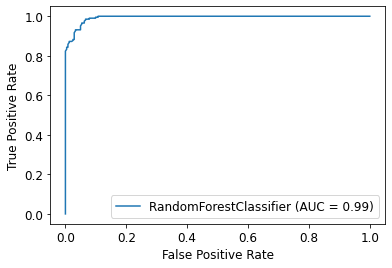

In [96]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[237   5]
 [122  82]]
0.7152466367713004
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       242
           1       0.94      0.40      0.56       204

    accuracy                           0.72       446
   macro avg       0.80      0.69      0.68       446
weighted avg       0.79      0.72      0.69       446



In [99]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[16:32:08] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[229  13]
 [ 13 191]]
0.9417040358744395
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       242
           1       0.94      0.94      0.94       204

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446



0.9412777507697293

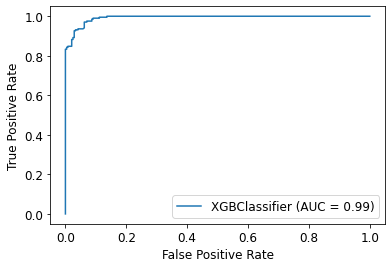

In [101]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [121]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9282511210762332

KNN give best accuracy and low error rate so i go with KNN